In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ChinaUnicom = pd.read_csv('ChinaUnicom.csv')
ChinaUnicom.index = ChinaUnicom.iloc[:, 1]
ChinaUnicom.index = pd.to_datetime(ChinaUnicom.index, format='%Y-%m-%d')
ChinaUnicom = ChinaUnicom.iloc[:, 2:]

In [3]:
ChinaUnicom.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,7.31,7.32,7.13,7.14,159457000.0
2010-01-05,7.16,7.40,7.06,7.39,269085200.0
2010-01-06,7.35,7.42,7.21,7.23,149647400.0
2010-01-07,7.22,7.27,7.00,7.02,169879700.0
2010-01-08,7.00,7.14,6.98,7.11,113754100.0


In [4]:
Close = ChinaUnicom.Close
High = ChinaUnicom.High
Low = ChinaUnicom.Low

In [5]:
#BBands
def bbands(tsPrice, period=20, times=2):
    upBBand = pd.Series(0.0, index=tsPrice.index)
    midBBand = pd.Series(0.0, index=tsPrice.index)
    downBBand = pd.Series(0.0, index=tsPrice.index)
    sigma = pd.Series(0.0, index=tsPrice.index)
    for i in range(period - 1, len(tsPrice)):
        midBBand[i] = np.nanmean(tsPrice[i - (period - 1):(i + 1)])
        sigma[i] = np.nanstd(tsPrice[i - (period - 1):(i + 1)])
        upBBand[i] = midBBand[i] + times * sigma[i]
        downBBand[i] = midBBand[i] - times * sigma[i]
    BBands=pd.DataFrame({'upBBand': upBBand[(period-1):],\
                         'midBBand': midBBand[(period-1):],\
                         'downBBand': downBBand[(period-1):],\
                         'sigma': sigma[(period-1):]})
    return (BBands)

In [6]:
UnicomBBands = bbands(Close, 20, 2)
UnicomBBands.head()

,upBBand,midBBand,downBBand,sigma
Date,,,,
2010-01-29,7.797957,7.2775,6.757043,0.260228
2010-02-01,7.826073,7.2575,6.688927,0.284286
2010-02-02,7.840863,7.2215,6.602137,0.309682
2010-02-03,7.849999,7.1975,6.545001,0.326250
2010-02-04,7.870401,7.1790,6.487599,0.345701


In [7]:
upDownBB = UnicomBBands[['downBBand', 'upBBand']]
upDownBB13 = upDownBB['2013-01-01':'2013-06-28']

In [8]:
ChinaUnicom13 = ChinaUnicom['2013-01-01':'2013-06-28']

D:\Programing\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)
D:\Programing\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Programing\Anaconda3\lib\site-packages\pandas\core\indexing.py:1047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

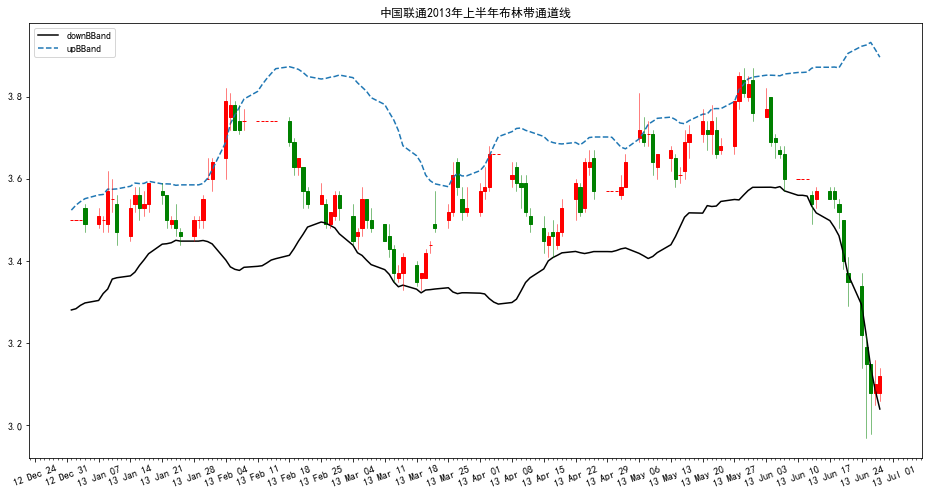

In [9]:
fig = plt.figure(figsize=(16, 8))
plt.rcParams['font.sans-serif'] = ['SimHei']
import candle
candle.candleLinePlots(candleData=ChinaUnicom13,\
        candleTitle='中国联通2013年上半年布林带通道线',\
        Data=upDownBB13)

In [10]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="boll1.png")

In [11]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="boll2.png")

In [12]:
def CalBollRisk(tsPrice, multiplier):
    k = len(multiplier)
    overUp = []
    belowDown = []
    BollRisk = []
    for i in range(k):
        BBands = bbands(tsPrice, 20, multiplier[i])
        a = 0
        b = 0
        for j in range(len(BBands)):
            tsPrice = tsPrice[-(len(BBands)):]
            if tsPrice[j] > BBands.upBBand[j]:
                a += 1
            elif tsPrice[j] < BBands.downBBand[j]:
                b += 1
        overUp.append(a)
        belowDown.append(b)
        BollRisk.append(100 * (a + b) / len(tsPrice))
    return (BollRisk)

In [14]:
multiplier = [1, 1.65, 1.96, 2, 2.58]
price2010 = Close['2010-01-04':'2010-12-31']
CalBollRisk(price2010, multiplier)

[51.98237885462555,
 22.596153846153847,
 12.698412698412698,
 11.764705882352942,
 3.9735099337748343]

In [15]:
price2012 = Close['2012-01-04':'2012-12-31']
CalBollRisk(price2012, multiplier)

[57.5,
 30.316742081447963,
 16.831683168316832,
 16.39344262295082,
 1.829268292682927]

In [16]:
price2013 = Close['2013-01-04':'2013-12-31']
CalBollRisk(price2013, multiplier)

[53.78151260504202,
 20.091324200913242,
 10.5,
 9.94475138121547,
 1.8518518518518519]

In [17]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="boll3.png")

In [18]:
def upbreak(tsLine, tsRefLine):
    n = min(len(tsLine), len(tsRefLine))
    tsLine = tsLine[-n:]
    tsRefLine = tsRefLine[-n:]
    signal = pd.Series(0, index=tsLine.index)
    for i in range(1, len(tsLine)):
        if all([tsLine[i] > tsRefLine[i], tsLine[i - 1] < tsRefLine[i - 1]]):
            signal[i] = 1
    return (signal)


def downbreak(tsLine, tsRefLine):
    n = min(len(tsLine), len(tsRefLine))
    tsLine = tsLine[-n:]
    tsRefLine = tsRefLine[-n:]
    signal = pd.Series(0, index=tsLine.index)
    for i in range(1, len(tsLine)):
        if all([tsLine[i] < tsRefLine[i], tsLine[i - 1] > tsRefLine[i - 1]]):
            signal[i] = 1
    return (signal)

In [19]:
#strategy
BBands = bbands(Close, 20, 2)

upbreakBB1 = upbreak(Close, BBands.upBBand)
downbreakBB1 = downbreak(Close, BBands.downBBand)

upBBSig1 = -upbreakBB1.shift(2)
downBBSig1 = downbreakBB1.shift(2)

tradSignal1 = upBBSig1 + downBBSig1
tradSignal1[tradSignal1 == 0] = 0


def perform(tsPrice, tsTradSig):
    ret = tsPrice / tsPrice.shift(1) - 1
    tradRet = (ret * tsTradSig).dropna()
    ret = ret[-len(tradRet):]
    winRate=[len(ret[ret>0])/len(ret[ret!=0]),\
             len(tradRet[tradRet>0])/len(tradRet[tradRet!=0])]
    meanWin=[np.mean(ret[ret>0]),\
             np.mean(tradRet[tradRet>0])]
    meanLoss=[np.mean(ret[ret<0]),\
             np.mean(tradRet[tradRet<0])]
    Performance=pd.DataFrame({'winRate': winRate,'meanWin': meanWin,\
                             'meanLoss': meanLoss})
    Performance.index = ['Stock', 'Trade']
    return (Performance)

In [20]:
Performance1 = perform(Close, tradSignal1)
Performance1

,winRate,meanWin,meanLoss
Stock,0.458525,0.013320,-0.012599
Trade,0.557692,0.014709,-0.011710


In [21]:
upbreakBB2 = upbreak(Close, BBands.downBBand)
downbreakBB2 = downbreak(Close, BBands.upBBand)

In [22]:
upBBSig2 = upbreakBB2.shift(2)
downBBSig2 = -downbreakBB2.shift(2)
tradSignal2 = upBBSig2 + downBBSig2
tradSignal2[tradSignal2 == 0] = 0

In [23]:
Performance2 = perform(Close, tradSignal2)
Performance2

,winRate,meanWin,meanLoss
Stock,0.458525,0.013320,-0.012599
Trade,0.529412,0.014584,-0.010517
